In [99]:
import numpy as np
import matplotlib.pyplot as plt

In [100]:
def setEp(m1,v1,m2,v2):
    E0 = 0.5*m1*v1**2+0.5*m2*v2**2
    p0 = m1*v1+m2*v2
    return (E0,p0)

In [101]:
def collide(m1,m2,v1,v2,E0,p0):
    a = m2**2/m1+m2
    b = -2*p0*m2/m1
    c = p0**2/m1-2*E0
    
    v21 = (-1.0*b+np.sqrt(b**2-4.0*a*c))/(2.0*a)
    v22 = (-1.0*b-np.sqrt(b**2-4.0*a*c))/(2.0*a)
    #print ("v2 roots: ",v21,v22)
    
    v11 = (p0-m2*v21)/m1
    v12 = (p0-m2*v22)/m1
    
    #print ("v1 roots: ",v11,v12)
    #print()
    
    return (v12,v22)

In [125]:
xl = []
yl = []

m1 = 1000000000000.0
m2 = 1.0

v1 = -2.0
v2 = 0.0

N_collisions = 0

print (v1,v2)
print()
xl.append(np.sqrt(m1)*v1)
yl.append(np.sqrt(m2)*v2)
    

flag = True
while (flag):
    
    E0,p0 = setEp(m1,v1,m2,v2)
    v1,v2 = collide(m1,m2,v1,v2,E0,p0)
    xl.append(np.sqrt(m1)*v1)
    yl.append(np.sqrt(m2)*v2)
    N_collisions +=1 
    #print (v1,v2)
    #print()

    v2 = -v2
    if (v1>0 and v2>0 and v1>v2):
        #N_collisions += 1
        flag = False
    else:
        xl.append(np.sqrt(m1)*v1)
        yl.append(np.sqrt(m2)*v2)
        N_collisions += 1

    #print (v1,v2)
    #print()
    
    
print ("Number of collisions = ",N_collisions)

print ("Pi = ",N_collisions*np.sqrt(m2/m1))



-2.0 0.0

Number of collisions =  3141591
Pi =  3.141591


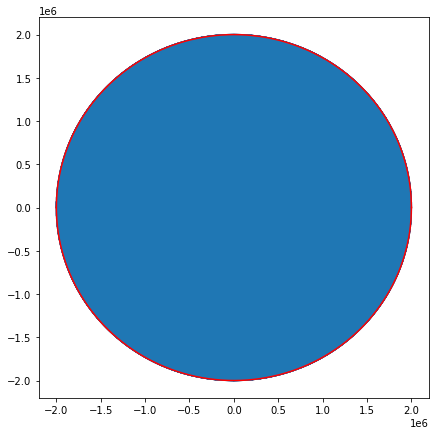

In [126]:
plt.figure(figsize=(7, 7))
plt.plot(xl,yl)

x = []
yu = []
yl = []
for i in range(1000):
    x.append(-np.sqrt(2.0*E0) + i/999.0*2*np.sqrt(2.0*E0))
    yu.append(np.sqrt(2.0*E0 - x[i]**2))
    yl.append(-np.sqrt(2.0*E0 - x[i]**2))
    
plt.plot(x,yu,'r-')
plt.plot(x,yl,'r-')
    